In [1]:
# load image

import numpy as np
import cv2

image = cv2.imread('mrbean.jpg', 0)
    
row,col = image.shape
print(row,col)

cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

326 435


In [5]:
kernel = np.ones((5,5), np.float32) / 25.0
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


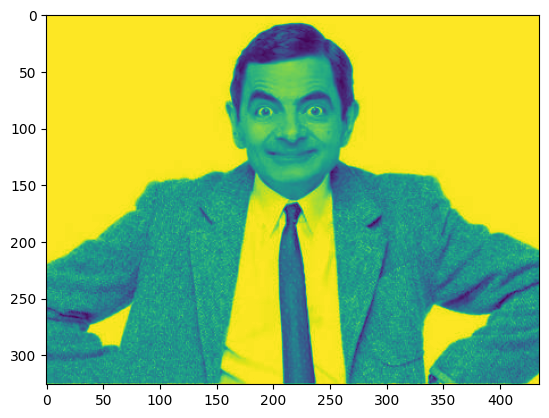

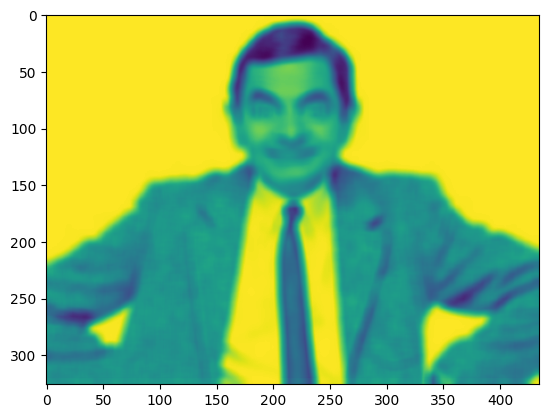

In [2]:
# load image and blurring

import numpy as np
import cv2
import matplotlib.pyplot as plt

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((9,9), np.float32) / 81.0

# compute mean for each pixel
dst = cv2.filter2D(image, cv2.CV_8U, kernel)

# show images
plt.imshow(image)
plt.show()
plt.imshow(dst)


In [13]:
# numpy review
import numpy as np

arr = np.ones((5,5))
print(arr)

roi = arr[1:4, 1:4]
print(roi)

# change
roi = roi + 1

arr[1:4, 1:4] = roi
print(arr)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1. 1. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1.]]


In [8]:
# load image and blurring using mask-simple

import numpy as np
import cv2

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 0)

# create kernel
kernel = np.ones((5,5), np.float32) / 25.0

# Select ROI (top_y,top_x,height, width)
roi = image[40:140,150:280]

# compute mean for each pixel
roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

image[40:140,150:280] = roi

# show images
cv2.imshow('roi', roi)
cv2.imshow('image', image)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# load image and blurring using face detection

import numpy as np
import cv2

# face detection setup
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# load image in grayscale mode
image = cv2.imread('mrbean.jpg', 1)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# face detection
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
# create kernel
kernel = np.ones((7,7), np.float32) / 49.0

# Draw the rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi = image[y:y+h,x:x+w]

    # compute mean for each pixel
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

    # update
    image[y:y+h,x:x+w] = roi

# show images
cv2.imshow('image', image)

# waiting for any keys pressed and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)

while True:
    # Read the frame
    _, img = cap.read()
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    
    # Display
    cv2.imshow('img', img)
    
    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)

# create kernel
kernel = np.ones((7,7), np.float32) / 49.0

while True:
    # Read the frame
    _, img = cap.read()
    img2 = img.copy()
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        # Select ROI (top_y,top_x,height, width)
        roi = img[y-10:y+h+10,x-10:x+w+10]

        # compute mean for each pixel
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)
        roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

        # update
        img[y-10:y+h+10,x-10:x+w+10] = roi
    
    # Display
    cv2.imshow('img', img)
    cv2.imshow('img2', img2)
    
    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()